<a href="https://colab.research.google.com/github/Rosha2020/IIC3633/blob/master/Copy_of_pyRecLab_SlopeOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://youtu.be/A2euuevpYis" target="_parent"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/YouTube_full-color_icon_%282017%29.svg/71px-YouTube_full-color_icon_%282017%29.svg.png" alt="Open In Colab"/></a>


# **Práctico Sistemas Recomendadores: pyreclab - Slope One**

En este práctico seguiremos utilizando [pyreclab](https://github.com/gasevi/pyreclab), con el cual estamos aprendiendo distintas técnicas de recomendación. Seguiremos usando la misma base de datos de los prácticos anteriores, para que puedan comparar los métodos y sus implementaciones. Este práctico está acompañado de un [video comentando la actividad](https://youtu.be/A2euuevpYis).

In this practical we will continue using pyreclab, with which we are learning different recommendation techniques. We will continue to use the same database as the previous hands-on, so that you can compare the methods and their implementations. This practical is accompanied by a video commenting on the activity.

En esta oportunidad exploraremos el recomendador de Pendiente Uno o **Slope One** [1].

**Adaptado y preparado por:** Francisca Cattan 📩 fpcattan@uc.cl

Referencias 📖
------
[1] *Lemire, D., & Maclachlan, A. (2005, April). Slope One Predictors for Online Rating-Based Collaborative Filtering. In SDM (Vol. 5, pp. 1-5).*


**Nombre**:  completa tu nombre aquí :D

## Actividad 1 👓

Antes de empezar con el práctico, responde la siguiente pregunta con lo visto en clases.

**Pregunta:** Explique cómo funciona Slope One (como modelo teórico, no piense en la implementación). En particular explique:

- Repasemos: ¿Por qué este recomendador es un algoritmo de Filtrado Colaborativo?
- Este Filtrado Colaborativo, ¿está basado en el usuario o en los items? ¿Por qué?
- ¿Qué datos recibe Slope One y qué hace con ellos? (qué tipo de columnas y qué calculo)
- ¿Qué pasaría si se agrega un nuevo rating a la base de datos?
- Opcional: ¿Cómo crees que le iría al recomendador con un usuario que acaba de entrar al sistema y ha asignado muy pocos ratings?

💡 *Hint: La bibliografía todo lo puede.*

Before starting with the practical, answer the following question with what you have seen in class.

Question: Explain how Slope One works (as a theoretical model, don't think about implementation). In particular explain:
- Let's review: Why is this recommender a Collaborative Filtering algorithm?
- This Collaborative Filtering, is it based on the user or on the items? Why?
- What data does Slope One receive and what does it do with it? (what kind of columns and what do I calculate)
- What would happen if a new rating is added to the database?
- Optional: How do you think the recommender would fare with a user who has just entered the system and has assigned very few ratings?

**Respuesta:**

1. slope one is a form of  Item-item collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items. so slope one is algorithms that is based on item based and works with  similarity between items.
2. SlopeOne is a rating-based (item - based) collaborative algorithm family predicting how a user would rate a given item from other users ratings. Slope One works on the intuitive principle of a popularity differential between items for users. 
3. When ratings of items are available, such as is the case when people are given the option of ratings resources (between 1 and 5, for example), collaborative filtering aims to predict the ratings of one individual based on his past ratings and on a (large) database of ratings contributed by other users. 
4. In this case, item-based collaborative filtering predicts the ratings on one item based on the ratings on another item, typically using linear regression  f ( x ) = a x + b . Hence, if there are 1,000 items, there could be up to 1,000,000 linear regressions to be learned, and so, up to 2,000,000 regressors.



# **Configuración Inicial**

## Paso 1:
Descargue directamente a Colab los archivos del dataset ejecutando las siguientes 3 celdas:

Download the dataset files directly to Colab by executing the following 3 cells:

In [29]:
!curl -L -o "u1.base" "https://drive.google.com/uc?export=download&id=1bGweNw7NbOHoJz11v6ld7ymLR8MLvBsA"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    476      0 --:--:-- --:--:-- --:--:--   476
100 1546k  100 1546k    0     0  1362k      0  0:00:01  0:00:01 --:--:-- 1362k


In [30]:
!curl -L -o "u1.test" "https://drive.google.com/uc?export=download&id=1f_HwJWC_1HFzgAjKAWKwkuxgjkhkXrVg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    771      0 --:--:-- --:--:-- --:--:--   771
100  385k  100  385k    0     0   498k      0 --:--:-- --:--:-- --:--:-- 6771k


In [31]:
!curl -L -o "u.item" "https://drive.google.com/uc?export=download&id=10YLhxkO2-M_flQtyo9OYV4nT9IvSESuz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    596      0 --:--:-- --:--:-- --:--:--   596
100  230k  100  230k    0     0   254k      0 --:--:-- --:--:-- --:--:-- 5367k


Los archivos **u1.base** y **u1.test** tienen tuplas {usuario, item, rating, timestamp}, que es la información de preferencias de usuarios sobre películas en una muestra del dataset [movielens](https://grouplens.org/datasets/movielens/).

The files u1.base and u1.test have tuples {user, item, rating, timestamp}, which is the user preferences information about movies in a sample of the movielens dataset.

## Paso 2:

Instalamos pyreclab utilizando pip.

We install pyreclab using pip.

In [32]:
!pip install pyreclab --upgrade

Requirement already up-to-date: pyreclab in /usr/local/lib/python3.6/dist-packages (0.1.15)


## Paso 3:

Hacemos los imports necesarios para este práctico.

We do the necessary imports for this practical.

In [33]:
import pyreclab
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")

# **El dataset**

💡 *En prácticos anteriores, vimos como analizar este dataset. Puedes revisarlos en caso de dudas.*

* In previous practicals, we saw how to analyze this dataset. You can review them in case of doubts. *



## Paso 4:

Ya que queremos crear una lista de recomendación de items para un usuario en especifico, necesitamos obtener información adicional de cada película tal como título, fecha de lanzamiento, género, etc. Cargaremos el archivo de items descargado "u.item" para poder mapear cada identificador de ítem al conjunto de datos que lo describe.

Since we want to create a recommendation list of items for a specific user, we need to get additional information about each movie such as title, release date, genre, etc. We will load the downloaded items file "u.item" to be able to map each item identifier to the dataset that describes it.

In [34]:
# Definimos el orden de las columnas
# We define the order of the columns
info_cols = [ 'movieid', 'title', 'release_date', 'video_release_date', 'IMDb_URL', \
              'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', \
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', \
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ]

# Asignamos a una variable la estructura de datos de los items
# We assign the data structure of the items to a variable
info_file = pd.read_csv('u.item', sep='|', index_col = 0, names = info_cols, header=None, encoding='latin-1')

# **Slope One**

## Paso 5:

Seguiremos un camino muy similar a los ejercicios de User KNN e Item KNN. Crearemos una instancia del algoritmo de recomendación y luego pasaremos a la fase de entrenamiento.

We will follow a path very similar to the User KNN and Item KNN exercises. We will create an instance of the recommendation algorithm and then we will move on to the training phase

In [35]:
# Declaramos la instancia SlopeOne We declare the SlopeOne instance
mySlopeOne = pyreclab.SlopeOne(dataset='u1.base', dlmchar=b'\t', header=False, usercol=0, itemcol=1, ratingcol=2)

In [36]:
# Y enntrenamos # And we train
mySlopeOne.train()

## Actividad 2 👓

**Pregunta:** Explique qué hace el método `train()` en este caso, dado el modelo teórico. ¿Calcula información?, ¿no hace nada?, ¿ordena los datos? 

Explain what the train () method does in this case, given the theoretical model. Does it calculate information? Does it do nothing? Does it order the data?



**Respuesta:** it calculates informations

## Paso 6:

Llego la hora de predecir el rating.

predict the rating.

In [37]:
# Esta es la predicción de rating que el usuario ID:457 otorgaría al ítem ID:37
# De esta forma podemos comparar el resultado con los prácticos anteriores
# This is the rating prediction that user ID: 457 would give to item ID: 37
# In this way we can compare the result with the previous practical
mySlopeOne.predict("457", "37")

3.2408759593963623

In [38]:
# También podemos guardar la predicción en una variable We can also save the prediction in a variable
prediction = mySlopeOne.predict("457", "37")

In [39]:
# Podemos comprobar las peliculas rankeadas por el usuario ID:457
# Que ciertamente ha participado activamente (¡156 items!)
# We can check the movies ranked by the user ID: 457
# That he has certainly actively participated (156 items!)
train_file = pd.read_csv('u1.base', sep='\t', names = ['userid', 'itemid', 'rating', 'timestamp'], header=None)
train_file[train_file['userid'] == 457]

,userid,itemid,rating,timestamp
37269,457,1,4,882393244
37270,457,7,4,882393278
37271,457,9,5,882393485
37272,457,11,4,882397020
37273,457,13,3,882393883
...,...,...,...,...
37420,457,1047,2,882395964
37421,457,1119,4,882398308
37422,457,1168,5,882548761
37423,457,1210,4,882549905


In [40]:
# Y también cuáles usuarios han rankeado la pelicula ID:37 And also which users have ranked the movie ID: 37
train_file[train_file['itemid'] == 37]

,userid,itemid,rating,timestamp
1302,13,37,1,882397011
14851,201,37,2,884114635
19670,268,37,3,876514002
29489,363,37,2,891498510
31084,385,37,4,880013483
32996,405,37,1,885548384
62777,773,37,3,888540352


## Actividad 3 👓

Haremos un pequeño experimento para entender mejor como funciona Slope One. Gracias al ejercicio anterior, sabemos que el usuario 457 ya ha asignado el mejor rating (5 ⭐) a las dos peliculas ID:9 e ID:1168. Comparemos.

**Pregunta:** ¿Cómo se explican estos resultados?  

We will do a little experiment to better understand how Slope One works. Thanks to the previous exercise, we know that user 457 has already assigned the best rating (5 ⭐) to the two movies ID: 9 and ID: 1168. Let's compare.

Question: How are these results explained?


**Respuesta:** there are similarities between itemId 9 and 1168 interms of maybe genre, name of director and etc. for example when userid 457 ranks 5 stars to itemid 9, slope one predicates that itemid 1168 also has a similar ratings or maybe there are some users that have similar tasts which the algorthim predicates star 5 ratings according to similar tast users.

In [41]:
prediction_id9 = mySlopeOne.predict("457", "9")
prediction_id1168 = mySlopeOne.predict("457", "1168")

print('Prediction for ID:9 :', prediction_id9)
print('Prediction for ID:1168 :', prediction_id1168)

Prediction for ID:9 : 4.530702114105225
Prediction for ID:1168 : 4.166153907775879


## Paso 7:

Generaremos ahora una lista ordenada de las top-N recomendaciones, dado un usuario.

We will now generate an ordered list of the top-N recommendations, given a user.



In [42]:
# Mediante el método recommend() genereremos una lista top-5 recomendaciones para el usuario ID:457
# Using the recommend () method we will generate a list of top-5 recommendations for user ID: 457


reclist_slopeone = mySlopeOne.recommend("457", 5)

# Y visualizaremos el resultado
# And we will visualize the result
print('Lista de items según ID:', reclist_slopeone)

Lista de items según ID: ['1592', '1589', '1656', '1431', '1653']


In [43]:
# Lo convertimos a numpy array  We convert it to numpy array

recmovies_slopeone = np.array(reclist_slopeone).astype(int)

# Utilizamos la estructura de datos de los items para encontrar los títulos recomendados 
# We use the data structure of the items to find the recommended titles
print('Lista de items por nombre:')
info_file.loc[recmovies_slopeone]['title']

Lista de items por nombre:


movieid
1592                               Magic Hour, The (1998)
1589                                   Schizopolis (1996)
1656                                   Little City (1998)
1431                                  Legal Deceit (1997)
1653    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object

## Actividad 4 👩🏻‍💻

Genera una nueva recomendacion, modificando los hiperparametros de usuario y topN a tu elección.

Generate a new recommendation, modifying the user and topN hyperparameters of your choice.

**Pregunta:** ¿Ves una diferencia en la recomendación entre el nuevo usuario y el usuario ID:457?

 Do you see a difference in recommendation between the new user and the user ID: 457?

**Respuesta:** yes. I modified the user id and 6 as a topN. I could see different recommendation between new user and user 457.


In [44]:
# Escribe el nuevo codigo aqui
# Mediante el método recommend() genereremos una lista top-5 recomendaciones para el usuario ID:457
# Using the recommend () method we will generate a list of top-5 recommendations for user ID: 457


reclist_slopeone = mySlopeOne.recommend("458", 6)

# Y visualizaremos el resultado
# And we will visualize the result
print('Lista de items según ID:', reclist_slopeone)


Lista de items según ID: ['1653', '1599', '1512', '1536', '1500', '1463']


In [45]:
# Lo convertimos a numpy array  We convert it to numpy array

recmovies_slopeone = np.array(reclist_slopeone).astype(int)

# Utilizamos la estructura de datos de los items para encontrar los títulos recomendados 
# We use the data structure of the items to find the recommended titles
print('Lista de items por nombre:')
info_file.loc[recmovies_slopeone]['title']

Lista de items por nombre:


movieid
1653    Entertaining Angels: The Dorothy Day Story (1996)
1599                        Someone Else's America (1995)
1512               World of Apu, The (Apur Sansar) (1959)
1536                                 Aiqing wansui (1994)
1500                            Santa with Muscles (1996)
1463                                     Boys, Les (1997)
Name: title, dtype: object

## Actividad 5 👩🏻‍💻

Dado el usuario ID:44, cree dos listas de películas recomendadas; la primera utilizando el algoritmo Most Popular y la segunda utilizando el algoritmo Slope One.

Given user ID: 44, create two recommended movie lists; the first using the Most Popular algorithm and the second using the Slope One algorithm.

**Pregunta:** Realice un analisis apreciativo de las similitudes y diferencias entre ambas recomendaciones.

Perform an appreciative analysis of the similarities and differences between the two recommendations.

**Respuesta:** for user ID 44 Most popular algorithm recommends [50, 100, 181, 286, 1, 121, 300, 127, 7, 98] and Slope one recommends ['1656', '1064', '1643', '1642', '1625'] for user ID 44. there are no similarities between two recommendation in terms of item id. However, regarding genre of to Most popular algorithm and Slope one we can see that they recommend movies with comedy, animation and children more than other genre.



In [50]:
# First we create the dataframe with the data


df_train = pd.read_csv('u1.base',
                         sep='\t',
                         names=['userid', 'itemid', 'rating', 'timestamp'],
                         header=None)
df_train.head()

,userid,itemid,rating,timestamp
0,1,3,4,878542960
1,1,4,3,876893119
2,1,5,3,889751712
3,1,6,5,887431973
4,1,7,4,875071561


In [51]:
# Ahora queremos realizar una observación rápida de los ratings 
# Now we want to take a quick look at the ratings

df_train.describe()[['rating']]

,rating
count,80000.000000
mean,3.526463
std,1.124429
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [52]:
columns = ['movieid', 'title', 'release_date', 'video_release_date', \
           'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', \
           'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
           'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', \
           'Thriller', 'War', 'Western']

In [53]:
# Cargamos el dataset con los items
# We load the dataset with the items
df_items = pd.read_csv('u.item',
                        sep='|',
                        index_col=0,
                        names = columns,
                        header=None, 
                        encoding='latin-1')
df_items.head()

,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


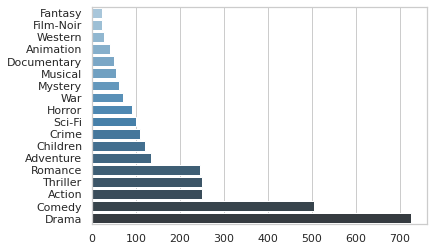

In [54]:
genre_columns = ['Action', 'Adventure', 'Animation', \
           'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
           'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', \
           'Thriller', 'War', 'Western']

genre_count = df_items[genre_columns].sum().sort_values()

sns.barplot(x=genre_count.values, y=genre_count.index, label="Total", palette="Blues_d")

In [46]:
# Definicion de objeto "most popular"
# Object definition "most popular
most_popular = pyreclab.MostPopular(dataset='u1.base',
                   dlmchar=b'\t',
                   header=False,
                   usercol=0,
                   itemcol=1,
                   ratingcol=2)

# en teoria no es "entrenar" , objeto "most_popular" solo registra los items más populares en el set de entrenamiento  
# In theory it is not "train", object "most_popular" only records the most popular items in the training set
most_popular.train()

In [47]:
# Testing de recomendaciones sobre los primeros 10 items 
# Recommendations testing on the first 10 items
top_n = 10

recommendList, maprec, ndcg = most_popular.testrec(input_file='u1.test',
                                          dlmchar=b'\t',
                                          header=False,
                                          usercol=0,
                                          itemcol=1,
                                          ratingcol=2,
                                          topn=top_n,
                                          relevance_threshold=2,
                                          includeRated=False)

print('MAP: {}\nNDCG@{}: {}'.format(maprec, top_n, ndcg))

MAP: 0.2889129174597905
NDCG@10: 0.1598011823409535


In [48]:
# Calcular las recomendaciones para un usuario en particular (id =44)
# Calculate recommendations for a particular user (id = 44)
user_id = 44

ranking = [int(r) for r in most_popular.recommend(str(user_id), top_n, includeRated=False)]
print('Recommendation for user {}: {}'.format(user_id, ranking))

Recommendation for user 44: [50, 100, 181, 286, 1, 121, 300, 127, 7, 98]


In [56]:
# Ver explicitamente las recomendaciones para un usuario determinado
# View explicitly the recommendations for a specific user
df_items.loc[ranking]

,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,,,,
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
100,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
286,"English Patient, The (1996)",15-Nov-1996,NaN,http://us.imdb.com/M/title-exact?English%20Pat...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
121,Independence Day (ID4) (1996),03-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Independence%...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
300,Air Force One (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Air+Force+One...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [18]:
# Escribe el nuevo codigo aqui
# Escribe el nuevo codigo aqui
# Mediante el método recommend() genereremos una lista top-5 recomendaciones para el usuario ID:457
# Using the recommend () method we will generate a list of top-5 recommendations for user ID: 457


reclist_slopeone = mySlopeOne.recommend("44", 5)

# Y visualizaremos el resultado
# And we will visualize the result
print('Lista de items según ID:', reclist_slopeone)



Lista de items según ID: ['1656', '1064', '1643', '1642', '1625']


In [19]:
# Lo convertimos a numpy array  We convert it to numpy array

recmovies_slopeone = np.array(reclist_slopeone).astype(int)

# Utilizamos la estructura de datos de los items para encontrar los títulos recomendados 
# We use the data structure of the items to find the recommended titles
print('Lista de items por nombre:')
info_file.loc[recmovies_slopeone]['title']

Lista de items por nombre:


movieid
1656          Little City (1998)
1064            Crossfire (1947)
1643           Angel Baby (1995)
1642    Some Mother's Son (1996)
1625           Nightwatch (1997)
Name: title, dtype: object